In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("drug200.csv")

In [4]:
#Eda(Exploratory data analysis) part

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
for col in df.columns:
    print(df[col].value_counts())

Age
47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: count, dtype: int64
Sex
M    104
F     96
Name: count, dtype: int64
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Na_to_K
12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: count, Length: 198, dtype: int64
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [9]:
# feature engineering part

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.compose import ColumnTransformer

In [11]:
df=pd.get_dummies(df,columns=["Sex"],drop_first=True)

In [12]:
df.head()

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_M
0,23,HIGH,HIGH,25.355,drugY,False
1,47,LOW,HIGH,13.093,drugC,True
2,47,LOW,HIGH,10.114,drugC,True
3,28,NORMAL,HIGH,7.798,drugX,False
4,61,LOW,HIGH,18.043,drugY,False


In [13]:
X=df.drop("Drug",axis=1)
y=df["Drug"]

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [15]:
df.head()

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_M
0,23,HIGH,HIGH,25.355,drugY,False
1,47,LOW,HIGH,13.093,drugC,True
2,47,LOW,HIGH,10.114,drugC,True
3,28,NORMAL,HIGH,7.798,drugX,False
4,61,LOW,HIGH,18.043,drugY,False


In [16]:
#Sex,BP,Cholesterol

In [17]:
df["Sex_M"].unique()  #One Hot

array([False,  True])

In [18]:
df["BP"].unique() #Ordinal Encode

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [19]:
df["Cholesterol"].unique()  #Ordinal Encode

array(['HIGH', 'NORMAL'], dtype=object)

In [20]:
column=["BP","Cholesterol"]
ordinal=OrdinalEncoder(categories=[["LOW","NORMAL","HIGH"],
                                   ["NORMAL","HIGH"]
    
])
preprocessing=ColumnTransformer([("name_doesnt_matter",ordinal,column)],remainder="passthrough")

In [21]:
X_train_encoded=preprocessing.fit_transform(X_train)
X_test_encoded=preprocessing.transform(X_test)

In [22]:
pd.DataFrame(X_train_encoded)

,0,1,2,3,4
0,0.0,1.0,68,10.291,True
1,2.0,0.0,60,8.621,True
2,0.0,1.0,22,8.151,True
3,1.0,0.0,55,7.261,True
4,0.0,0.0,20,11.686,False
...,...,...,...,...,...
155,2.0,0.0,31,11.227,True
156,0.0,0.0,47,33.542,True
157,2.0,1.0,61,25.475,False
158,1.0,1.0,24,25.786,True


In [23]:
tree=DecisionTreeClassifier()

In [24]:
tree.fit(X_train_encoded,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
y_pred=tree.predict(X_test_encoded)

In [26]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

0.975
              precision    recall  f1-score   support

       drugA       0.80      1.00      0.89         4
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         1
       drugX       1.00      1.00      1.00        13
       drugY       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.96      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40

Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 19]]


In [ ]:
# %97 accuracy Overfitting ?????

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [28]:
params={"criterion":["gini","entropy","log_loss"],
        "max_depth":[1,2,3,4,5,6,7,8,9,10],
        "splitter":["best","random"],
        "max_features":["sqrt","log2"]
    
}

In [29]:
grid=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params,cv=5,scoring="accuracy",refit=True)

In [30]:
grid.fit(X_train_encoded,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2'], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [31]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [32]:
tree2=DecisionTreeClassifier(criterion="log_loss",max_depth=8,max_features="log2",splitter="best")

In [33]:
tree2.fit(X_train_encoded,y_train)

,criterion,'log_loss'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
y_pred2=tree2.predict(X_test_encoded)

In [35]:
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred2))

0.875
              precision    recall  f1-score   support

       drugA       0.80      1.00      0.89         4
       drugB       1.00      0.33      0.50         3
       drugC       0.25      1.00      0.40         1
       drugX       0.91      0.77      0.83        13
       drugY       1.00      1.00      1.00        19

    accuracy                           0.88        40
   macro avg       0.79      0.82      0.72        40
weighted avg       0.93      0.88      0.88        40

Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 1  1  0  1  0]
 [ 0  0  1  0  0]
 [ 0  0  3 10  0]
 [ 0  0  0  0 19]]


In [47]:
#This Classifier is better for real life

[Text(0.4076086956521739, 0.9375, 'Cholesterol <= 50.5\nlog_loss = 2.001\nsamples = 160\nvalue = [19, 13, 15, 41, 72]'),
 Text(0.21739130434782608, 0.8125, 'Na_to_K <= 14.598\nlog_loss = 1.833\nsamples = 101\nvalue = [19, 0, 11, 27, 44]'),
 Text(0.3125, 0.875, 'True  '),
 Text(0.17391304347826086, 0.6875, 'Age <= 1.5\nlog_loss = 1.497\nsamples = 57\nvalue = [19, 0, 11, 27, 0]'),
 Text(0.13043478260869565, 0.5625, 'Age <= 0.5\nlog_loss = 0.868\nsamples = 38\nvalue = [0, 0, 11, 27, 0]'),
 Text(0.08695652173913043, 0.4375, 'BP <= 0.5\nlog_loss = 0.999\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.043478260869565216, 0.3125, 'log_loss = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.13043478260869565, 0.3125, 'log_loss = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.17391304347826086, 0.4375, 'log_loss = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0]'),
 Text(0.21739130434782608, 0.5625, 'log_loss = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0, 0]'),
 Text(0.2608695652173913

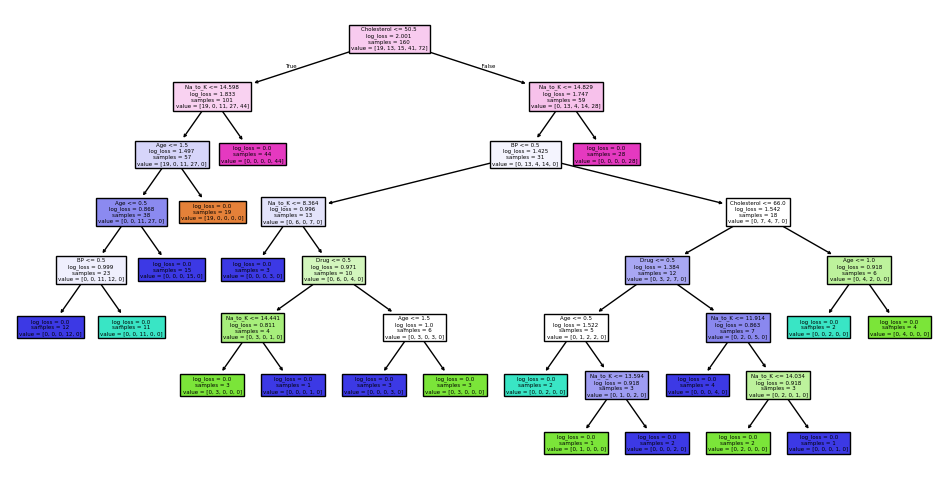

In [36]:
plt.figure(figsize=(12,6))
tree.plot_tree(tree2.fit(X_train_encoded,y_train),feature_names=df.columns,filled=True)

In [37]:
df2=pd.read_csv("petrol_consumption.csv")

In [38]:
df2.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [40]:
df2.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [41]:
df2.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [44]:
df2.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<Axes: >

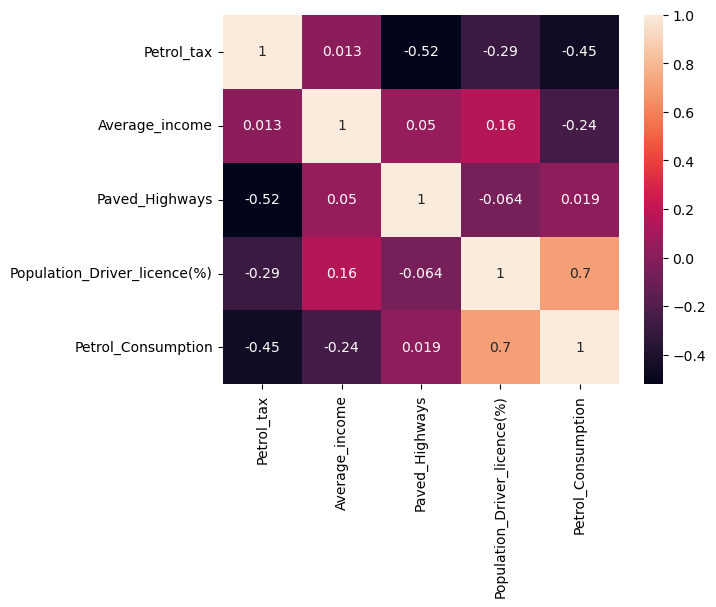

In [78]:
sns.heatmap(df2.corr(),annot=True)

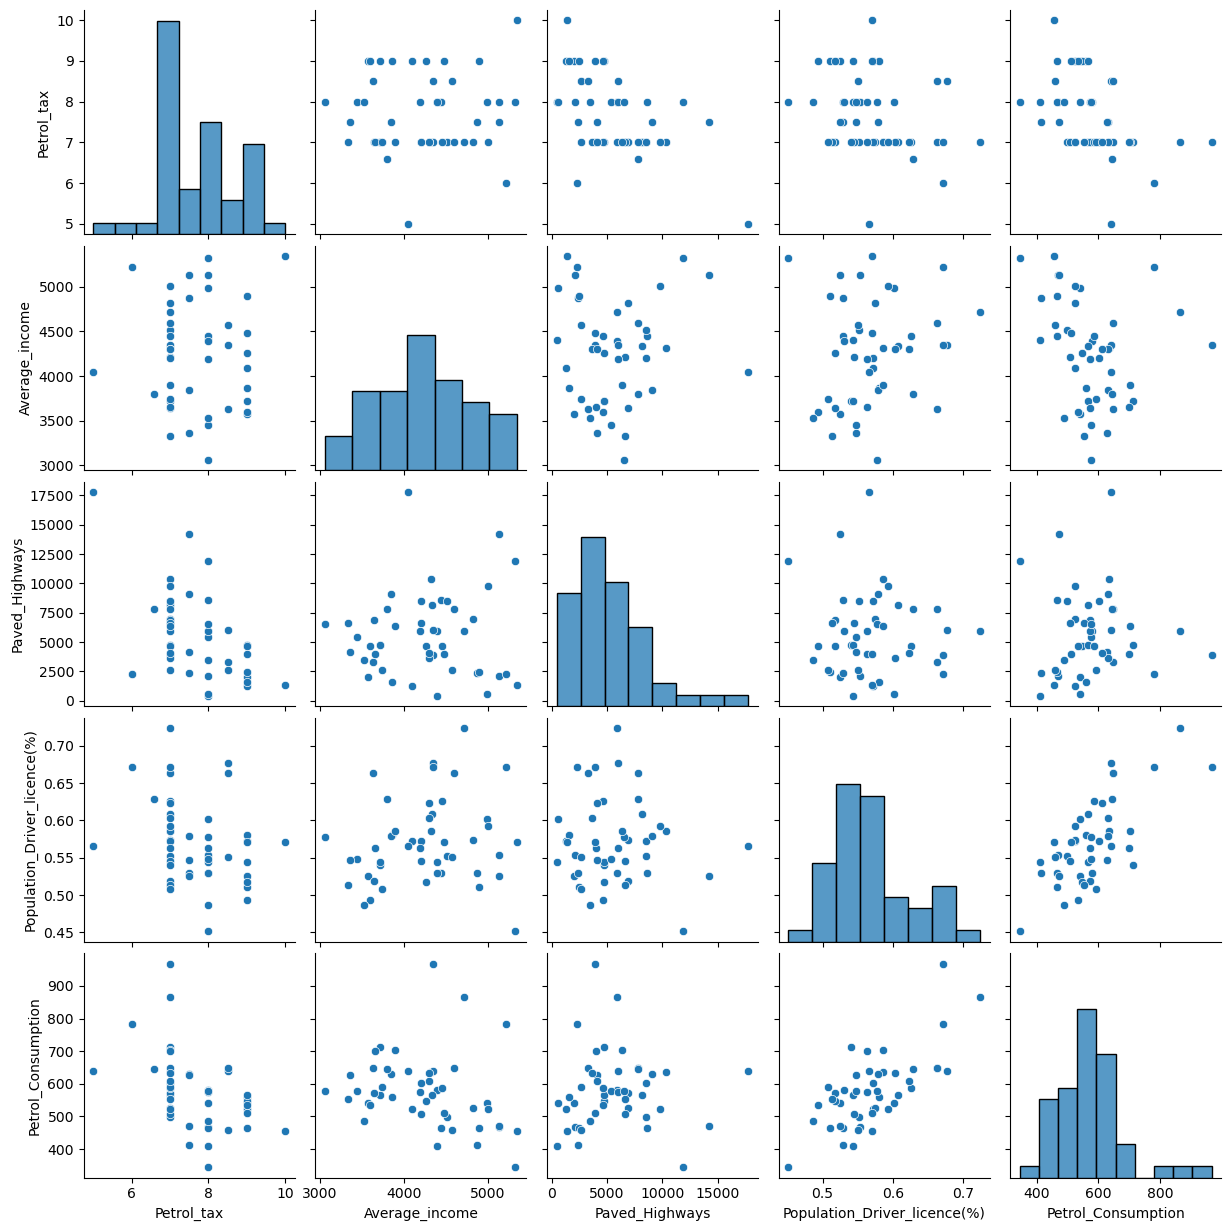

In [42]:
sns.pairplot(df2)
plt.show()

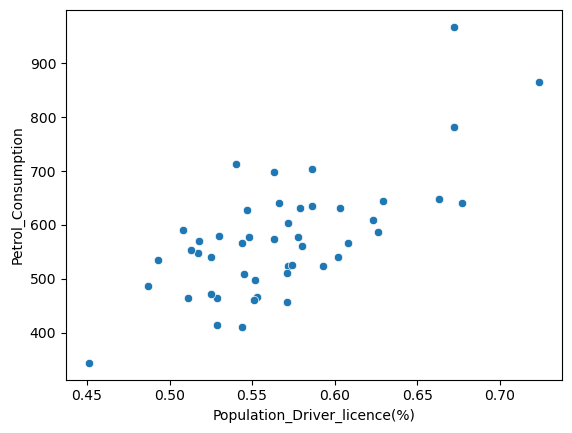

In [45]:
sns.scatterplot(data=df2,x="Population_Driver_licence(%)",y="Petrol_Consumption")
plt.show()

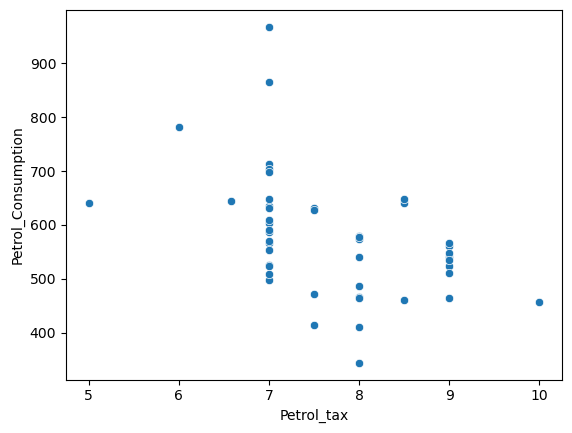

In [55]:
sns.scatterplot(data=df2,x="Petrol_tax",y="Petrol_Consumption")
plt.show()

In [49]:
X=df2.drop("Petrol_Consumption",axis=1)
y=df2["Petrol_Consumption"]

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [53]:
scaler=StandardScaler()
model=DecisionTreeRegressor()

In [56]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [58]:
params={"criterion":["squared_error","friedman_mse","absolute_error","poisson"],
        "splitter":["best","random"],
        "max_depth":[1,2,3,4,5,6,7,8,9,10],
        "max_features":["sgrt","log2"]
    
}

In [59]:
grid=GridSearchCV(estimator=model,param_grid=params,cv=5,n_jobs=-1,scoring="accuracy")

In [60]:
grid.fit(X_train_scaled,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['sgrt', 'log2'], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [69]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [74]:
model=DecisionTreeRegressor(criterion="squared_error",max_depth=8,max_features="log2",splitter="best")

In [75]:
model.fit(X_train_scaled,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [76]:
y_pred=model.predict(X_test_scaled)

In [73]:
print("Mse:",mean_squared_error(y_test,y_pred))
print("Mae:",mean_absolute_error(y_test,y_pred))
print("R2_score:",r2_score(y_test,y_pred))

Mse: 12515.416666666666
Mae: 70.5
R2_score: 0.08702394059883567


In [91]:
# we can see compression of our prediction with original data

<Axes: ylabel='Petrol_Consumption'>

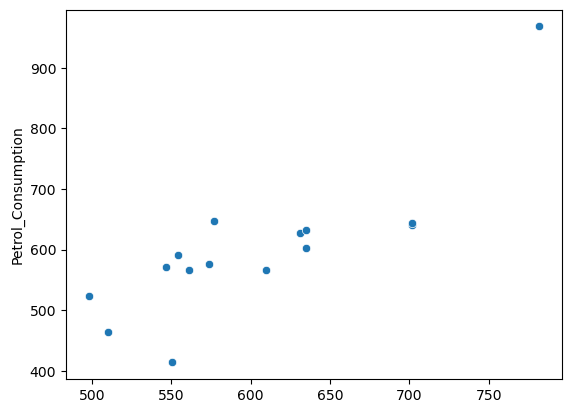

In [96]:
sns.scatterplot(x=y_pred,y=y_test)